# Lunes C1 - Ruta 3 - Julio

In [1]:
#Creación de datos 
n=14 # Clientes
clientes=[x for x in range(1,n+1)]

nodos=[0]+clientes
Q=2000  #capacidad 

import numpy as np
rnd=np.random
rnd.seed(0)

q={i:rnd.randint(1,10) for i in clientes}

### INSERTAR LOCACIONES DE PUNTOS DE VENTA 

In [2]:
#LATITUD

loc_y=([29.09291,
        29.12706,
        29.11965,
29.12369,
29.12432,
29.12442,
29.12589,
29.12777,
29.130644,
29.131696,
29.13342,
29.13536,
29.13694,
29.13949,
29.13981
])

#LONGITUD
loc_x=([-110.99926,
-110.98906,
-110.98379,
-110.99222,
-110.98204,
-111.00054,
-110.99573,
-111.00334,
-111.005415,
-111.023245,
-111.01490,
-110.99458,
-111.00556,
-110.99615,
-111.00762])


In [3]:
import matplotlib.pyplot as plt



In [4]:
arcos= {(i,j) for i in nodos for j in nodos if i!=j}


In [5]:
distancia={(i,j):np.hypot(loc_x[i]-loc_x[j],loc_y[i]-loc_y[j]) 
           for i in nodos for j in nodos if i!=j}


# Instalando librería para creación de modelo doccplex

In [6]:
import sys
try:
    import cplex
except:
    if hasattr(sys, 'real_prefix'):
        #we are in a virtual env.
        !pip install cplex
    else:
        !pip install --user cplex

In [7]:
import sys
try:
    import docplex.mp
except:
    if hasattr(sys, 'real_prefix'):
        #we are in a virtual env.
        !pip install docplex
    else:
        !pip install --user docplex

# Instalando Gurobi 

In [8]:
conda config --add channels http://conda.anaconda.org/gurobi


Note: you may need to restart the kernel to use updated packages.


In [9]:
conda install gurobi

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [10]:
from gurobipy import Model, GRB, quicksum

# Creación del modelo de optimización CVRP 

In [11]:
mdl = Model('CVRP')

Restricted license - for non-production use only - expires 2023-10-25


# Variables de decision

In [12]:
x = mdl.addVars(arcos, vtype=GRB.BINARY)
u = mdl.addVars(nodos, vtype=GRB.CONTINUOUS)

# Funcion objetivo

In [13]:
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i, j]*distancia[i, j] for i, j in arcos))

# Restricciones 

In [14]:
mdl.addConstrs(quicksum(x[i, j] for j in nodos if j != i) == 1 for i in clientes)
mdl.addConstrs(quicksum(x[i, j] for i in nodos if i != j) == 1 for j in clientes)
mdl.addConstrs((x[i, j] == 1) >> (u[i]+q[j] == u[j])
               for i, j in arcos if i != 0 and j != 0)
mdl.addConstrs(u[i] >= q[i] for i in clientes)
mdl.addConstrs(u[i] <= Q for i in clientes)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>}

In [15]:
mdl.Params.MIPGap = 0.1
mdl.Params.TimeLimit = 30  # seconds
mdl.optimize()

Set parameter MIPGap to value 0.1
Set parameter TimeLimit to value 30
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 56 rows, 225 columns and 420 nonzeros
Model fingerprint: 0x0ad7b5d8
Model has 182 general constraints
Variable types: 15 continuous, 210 integer (210 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-03, 5e-02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+03]
  GenCon rhs range [1e+00, 9e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 154 rows and 181 columns
Presolve time: 0.00s
Presolved: 210 rows, 406 columns, 847 nonzeros
Presolved model has 182 SOS constraint(s)
Variable types: 196 continuous, 210 integer (210 binary)
Found heuristic solution: objective 1.0849993

Root relaxation: objective 6.930732e-02, 18 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective

In [16]:
active_arcs = [a for a in arcos if x[a].x > 0.99]
active_arcs

[(10, 8),
 (7, 5),
 (3, 6),
 (4, 1),
 (6, 11),
 (0, 2),
 (1, 3),
 (14, 9),
 (13, 12),
 (5, 0),
 (11, 13),
 (12, 14),
 (8, 7),
 (2, 4),
 (9, 10)]

In [17]:
mdl.Params.MIPGap = 0.1
mdl.Params.TimeLimit = 30  # seconds
mdl.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 56 rows, 225 columns and 420 nonzeros
Model fingerprint: 0x0ad7b5d8
Model has 182 general constraints
Variable types: 15 continuous, 210 integer (210 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-03, 5e-02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+03]
  GenCon rhs range [1e+00, 9e+00]
  GenCon coe range [1e+00, 1e+00]
Presolved: 210 rows, 406 columns, 847 nonzeros
Presolved model has 182 SOS constraint(s)

Continuing optimization...

 160368 62929 infeasible   45         0.15487    0.11599  25.1%   4.4   30s
 182413 70170    0.13912   33    9    0.15487    0.11641  24.8%   4.5   35s
 201353 76795    0.14074   34    4    0.15487    0.11670  24.6%   4.6   40s
 215237 81194     cutoff   40         0.15487    0.11692  24.5%   4.6   45s
 232347 86226    0.14654   42    1    0

Text(0.5, 1.0, 'Gráfico de Nodos | VRP')

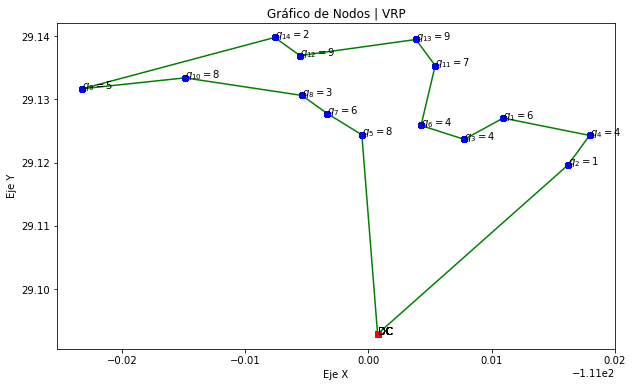

In [18]:
plt.figure(figsize=(10,6))

for i, j in active_arcs:
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', zorder=0)
    plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
    plt.scatter(loc_x[1:], loc_y[1:], c='b')
    plt.annotate('DC',(loc_x[0],loc_y[0]))
    
for i in clientes:
    plt.annotate('$q_{%d}=%d$'%(i,q[i]),(loc_x[i],loc_y[i]))

plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Gráfico de Nodos | VRP")